<a target="_blank" href="https://colab.research.google.com/github/YDayoub/MachineLearning_notebooks/blob/main/Ch3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from sklearn import datasets
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
iris = datasets.load_iris()
x, y = iris.data[:, [2, 3]], iris.target

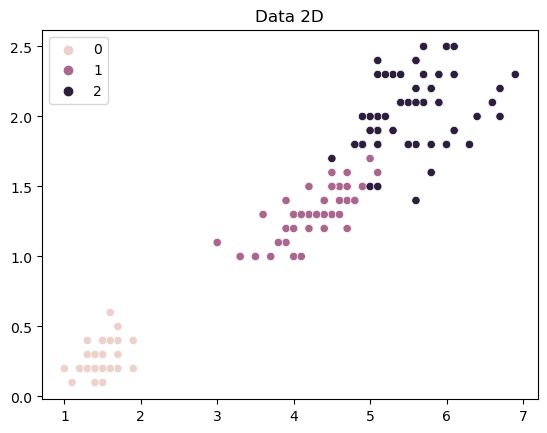

In [2]:
classes = ['class 0', 'class 1', 'class 2']
sns.scatterplot(x=x[:, 0], y=x[:, 1], 
               hue=y)
plt.title("Data 2D");
plt.show()


In [3]:
print(f"Class labels {np.unique(y)}")

Class labels [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1,
                                                   stratify=y)



In [5]:
print(f"original data: {np.bincount(y)}")
print(f"train data: {np.bincount(y_train)}")
print(f"test data: {np.bincount(y_test)}")

original data: [50 50 50]
train data: [40 40 40]
test data: [10 10 10]


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [7]:
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'cyan']
def plot_region(clf, x, y, res=0.01, title=None):
    x1min, x1max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2min, x2max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    cmap = ListedColormap(colors[:len(np.unique(y))])
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, res),
                          np.arange(x2min, x2max, res))
    labels = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    labels = labels.reshape(xx1.shape)
    plt.contourf(xx1, xx2, labels, cmap=cmap, alpha=0.3)
    classes = np.unique(y)
    for idx, cls in enumerate(classes):
        plt.scatter(x[y == cls, 0],
                   x[y == cls, 1],
                   c=colors[idx],
                   edgecolor='black',
                   label=f"cls {cls}")
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.legend()
    plt.xticks([])
    plt.yticks([])
    if title:
        plt.title(title)
    plt.show()    

In [8]:
import ipywidgets as widgets
from sklearn.linear_model import Perceptron

@widgets.interact
def fit_perceptron(eta0=(0.1, 0.2, 0.01)):
    clf = Perceptron(random_state=0, eta0=eta0)
    clf.fit(x_train_sc, y_train)
    preds = clf.predict(x_test_sc)
    score = accuracy_score(y_test, preds)
    plot_region(clf, sc.transform(x), y, title=f"Score {score:.2f} using eta0 {eta0:.2f}")
    #plt.title()
    

interactive(children=(FloatSlider(value=0.15000000000000002, description='eta0', max=0.2, min=0.1, step=0.01),…

In [9]:
from sklearn.linear_model import LogisticRegression


@widgets.interact
def fit_logistic_regression(C=(1, 10000, 50)):
    clf = LogisticRegression(C=C,
                             multi_class='ovr',
                             )
    clf.fit(x_train_sc, y_train)
    preds = clf.predict(x_test_sc)
    score = accuracy_score(y_test, preds)
    plot_region(clf, sc.transform(x), y, title=f"Score {score:.2f} using C {C}, max coeff {np.max(clf.coef_):.2f}")


interactive(children=(IntSlider(value=4951, description='C', max=10000, min=1, step=50), Output()), _dom_class…

In [10]:
from sklearn.svm import SVC


@widgets.interact
def fit_svm(C=(1, 10000, 50),
           kernel=['poly', 'linear', 'rbf']):
    
    clf = SVC(C=C,
              random_state=1,
             kernel=kernel)
    clf.fit(x_train_sc, y_train)
    preds = clf.predict(x_test_sc)
    score = accuracy_score(y_test, preds)
    plot_region(clf, sc.transform(x), y, title=f"Score {score:.2f} using C {C}")




interactive(children=(IntSlider(value=4951, description='C', max=10000, min=1, step=50), Dropdown(description=…

In [11]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
@widgets.interact
def fit_tree(depth=(1, 20, 1)):
    
    clf = DecisionTreeClassifier(max_depth=depth,
              random_state=1)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    score = accuracy_score(y_test, preds)
    plot_region(clf, x, y, title=f"Score {score:.2f} using max_depth {depth}")
    plot_tree(clf, feature_names=feature_names,
             filled=True)


# tree_model = DecisionTreeClassifier(criterion='gini',
#                                    max_depth = 15,
#                                    random_state=1)
# tree_model.fit(x_train, y_train)
# preds = tree_model.predict(x_test)
# accuracy_score(preds, y_test)

interactive(children=(IntSlider(value=10, description='depth', max=20, min=1), Output()), _dom_classes=('widge…

In [13]:
from sklearn.neighbors import KNeighborsClassifier

@widgets.interact
def fit_knn(n_neighbors=(1, 10, 1)):
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train_sc, y_train)
    preds = clf.predict(x_test_sc)
    score = accuracy_score(y_test, preds)
    plot_region(clf, sc.transform(x), y, title=f"Score {score:.2f} using neighbors {n_neighbors}")



interactive(children=(IntSlider(value=5, description='n_neighbors', max=10, min=1), Output()), _dom_classes=('…